# What happens when you use the wrong test?
This notebook compares how well a t-test and a permutation test can detect a significant effect when the underlying data are non-Gaussian distributed. In this case, the assumptions of the t-test are wrong, so it has _less power_ to detect real effects than the permutation test.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

In [25]:
# permutation test

n = 40 # size of each sample
es = 0.9 # effect size
ntest = 10000 # number of random sample pairs to create

arr = np.random.randn(2 * n, ntest) ** 5 ## VERY NON-GAUSSIAN WITH 5th POWER
arr[:n] += es

# run t-tests on each pair of samples
t,t_p = scipy.stats.ttest_ind(arr[:n], arr[n:])

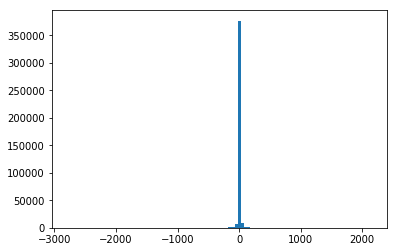

In [26]:
plt.hist(arr[:n].ravel(), 100);

In [27]:
# how many tests are significant at p<0.05 level according to t-test?
(t_p < 0.05).mean()

0.0386

In [28]:
# NEXT: run permutation tests on each pair of samples

n_perm = 1000

# create indices for permutation test
perm_inds = np.vstack([np.random.permutation(2*n) for _ in range(n_perm)])
print(perm_inds.shape)

(1000, 80)


In [29]:
perm_p = np.zeros(ntest) # initialize matrix to hold p-values

real_diffs = (arr[:n] - arr[n:]).mean(0) # store actual difference between sample means

for ii in range(ntest):
    perm = arr[:,ii][perm_inds] # create permuted samples
    perm_diffs = (perm[:,:n] - perm[:,n:]).mean(1) # compute mean difference for each permuted sample
    perm_p[ii] = (np.abs(perm_diffs) > np.abs(real_diffs[ii])).mean() # compare to real difference

In [30]:
# how many tests are significant at p<0.05 level according to permutation test?
(perm_p < 0.05).mean()

0.073

Text(0,0.5,'power')

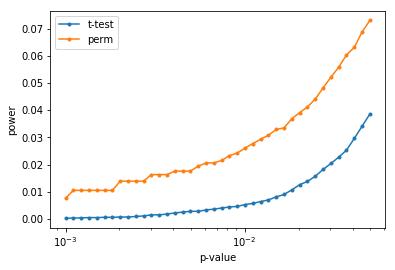

In [31]:
# compare power of t-test and permutation test for each p-value threshold

p_thresholds = np.logspace(-3, np.log10(0.05), 40)
ttest_power = np.array([(t_p<pthresh).mean() for pthresh in p_thresholds])
perm_power = np.array([(perm_p<pthresh).mean() for pthresh in p_thresholds])

plt.semilogx(p_thresholds, ttest_power, '.-', label='t-test')
plt.semilogx(p_thresholds, perm_power, '.-', label='perm')
plt.legend()
plt.xlabel("p-value")
plt.ylabel("power")